In [1]:
import pandas as pd
import timeit 
import matplotlib.pyplot as plt
from matplotlib import figure as fig
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Sequential

In [2]:
data_raw = pd.read_csv('lol_data.csv')
data_raw.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
#Min-Max Normalizing Data 
data_scaled = (data_raw - data_raw.min()) / (data_raw.max() - data_raw.min()) 

In [4]:
data_scaled.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0.962031,0.0,0.093878,0.074074,1.0,0.409091,0.272727,0.379310,0.0,0.0,...,0.0,0.464844,0.588235,0.557608,0.494505,0.579545,0.485446,0.472598,0.494505,0.464844
1,0.980146,0.0,0.028571,0.037037,0.0,0.227273,0.227273,0.172414,0.0,0.0,...,0.5,0.556250,0.588235,0.590732,0.730769,0.545455,0.644706,0.538488,0.730769,0.556250
2,0.971990,0.0,0.040816,0.000000,0.0,0.318182,0.500000,0.137931,0.5,1.0,...,0.0,0.527170,0.588235,0.575144,0.527473,0.272727,0.566848,0.530570,0.527473,0.527170
3,0.984497,0.0,0.155102,0.037037,0.0,0.181818,0.227273,0.172414,0.5,0.0,...,0.0,0.457118,0.647059,0.635039,0.703297,0.488636,0.573530,0.472541,0.703297,0.457118
4,0.604712,0.0,0.285714,0.148148,0.0,0.272727,0.272727,0.206897,0.0,0.0,...,0.0,0.537500,0.647059,0.664859,0.648352,0.715909,0.559313,0.459137,0.648352,0.537500


In [5]:
ct = pd.crosstab(data_raw['blueFirstBlood'], data_raw['blueWins'],)
ct

blueWins,0,1
blueFirstBlood,,
0,2949,1943
1,2000,2987


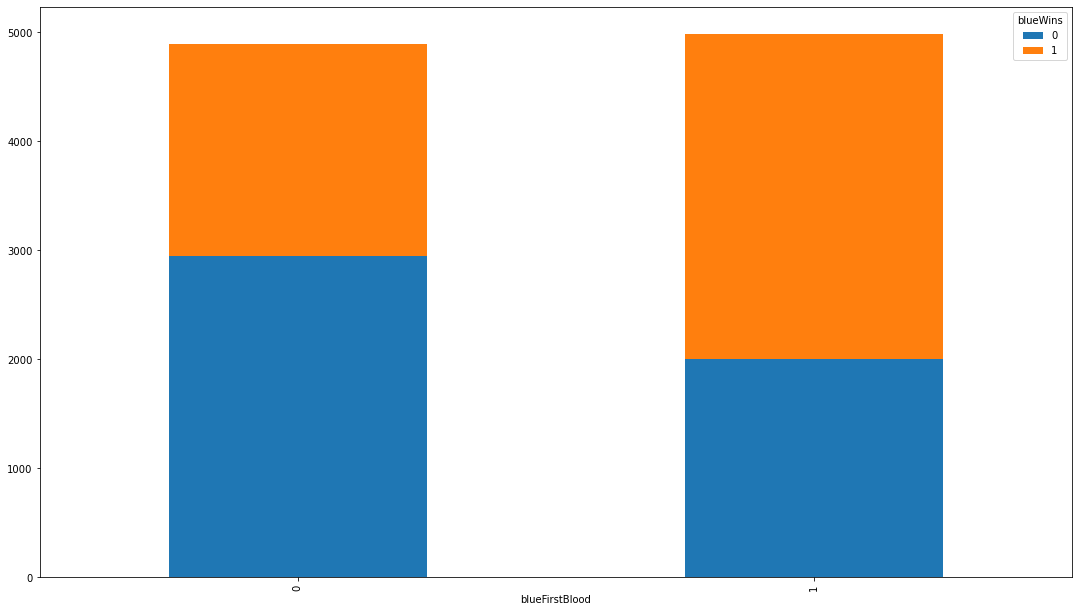

In [6]:
ct.plot.bar(stacked=True, figsize =(18.5, 10.5))

In [7]:
# Separating X and y

X = data_scaled.drop(['blueWins', 'gameId'], axis = 1)
y = data_scaled.blueWins.astype(int)
X.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0.093878,0.074074,1.0,0.409091,0.272727,0.379310,0.0,0.0,0.0,0.0,...,0.0,0.464844,0.588235,0.557608,0.494505,0.579545,0.485446,0.472598,0.494505,0.464844
1,0.028571,0.037037,0.0,0.227273,0.227273,0.172414,0.0,0.0,0.0,0.0,...,0.5,0.556250,0.588235,0.590732,0.730769,0.545455,0.644706,0.538488,0.730769,0.556250
2,0.040816,0.000000,0.0,0.318182,0.500000,0.137931,0.5,1.0,0.0,0.0,...,0.0,0.527170,0.588235,0.575144,0.527473,0.272727,0.566848,0.530570,0.527473,0.527170
3,0.155102,0.037037,0.0,0.181818,0.227273,0.172414,0.5,0.0,1.0,0.0,...,0.0,0.457118,0.647059,0.635039,0.703297,0.488636,0.573530,0.472541,0.703297,0.457118
4,0.285714,0.148148,0.0,0.272727,0.272727,0.206897,0.0,0.0,0.0,0.0,...,0.0,0.537500,0.647059,0.664859,0.648352,0.715909,0.559313,0.459137,0.648352,0.537500


In [8]:
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)
y_train.head()

5018    0
4932    0
6453    0
3131    0
8743    1
Name: blueWins, dtype: int32

In [9]:
# Creating, Training and Testing the Decision Tree Model
dtree = DecisionTreeClassifier(random_state=99)

In [10]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

In [11]:
predictions_tree = dtree.predict(X_test)
pd.crosstab(y_test, predictions_tree)

col_0,0,1
blueWins,,
0,1031,600
1,565,1065


In [12]:
accuracy_tree = accuracy_score(y_test, predictions_tree)
print(f'Accuracy of Decision Tree = {accuracy_tree}')

Accuracy of Decision Tree = 0.6427476234283962


In [13]:
#Creating,Training and Testing the Logistic Regression Model
log_regres = LogisticRegression(random_state=99)

In [14]:
log_regres.fit(X_train, y_train)

c:\users\neerj\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=99)

In [15]:
predictions_reg = log_regres.predict(X_test)
pd.crosstab(y_test, predictions_reg)

col_0,0,1
blueWins,,
0,1193,438
1,443,1187


In [16]:
accuracy_reg = accuracy_score(y_test, predictions_reg)
print(f'Accuracy of Logistic Regression Model = {accuracy_reg}')

Accuracy of Logistic Regression Model = 0.72983747316774


In [17]:
#Creating,Training and Testing the Support Vector Machine
svm = SVC()

In [18]:
svm.fit(X_train, y_train)

SVC()

In [19]:
predictions_svm = svm.predict(X_test)
pd.crosstab(y_test, predictions_svm)

col_0,0,1
blueWins,,
0,1203,428
1,471,1159


In [20]:
accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f'Accuracy of SVM = {accuracy_svm}')

Accuracy of SVM = 0.7243176939589083


In [21]:
#Defining, Training and Testing a Simple NN

model = Sequential()
model.add(Input(38))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
epochs = 20
batch_size = 16

In [24]:
model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/20
414/414 [==============================] - 1s 3ms/step - loss: 0.5714 - accuracy: 0.7082
Epoch 2/20
414/414 [==============================] - 1s 2ms/step - loss: 0.5404 - accuracy: 0.7208
Epoch 3/20
414/414 [==============================] - 1s 2ms/step - loss: 0.5367 - accuracy: 0.7274
Epoch 4/20
414/414 [==============================] - 1s 2ms/step - loss: 0.5354 - accuracy: 0.7239
Epoch 5/20
414/414 [==============================] - 1s 2ms/step - loss: 0.5349 - accuracy: 0.7271
Epoch 6/20
414/414 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy: 0.7288
Epoch 7/20
414/414 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.7301
Epoch 8/20
414/414 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7282
Epoch 9/20
414/414 [==============================] - 1s 3ms/step - loss: 0.5330 - accuracy: 0.7303
Epoch 10/20
414/414 [==============================] - 1s 3ms/step - loss: 0.5321 - accuracy: 0.7273

In [25]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

102/102 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7228
0.5424675345420837
0.7227843999862671


In [ ]:
nn_predictions = model.predict_classes(X_test)
nn_predictions

In [27]:
accuracy_nn = accuracy_score(y_test, nn_predictions)
print(f'Accuracy of Neural Network Model = {accuracy_nn}')

Accuracy of Neural Network Model = 0.7227844219564551


In [28]:
#Comparing Prediction Latencies for all methods 
start_dtree = timeit.default_timer()
dtree.predict(X_test)
stop_dtree = timeit.default_timer()

start_svm = timeit.default_timer()
svm.predict(X_test)
stop_svm = timeit.default_timer()

start_lreg = timeit.default_timer()
log_regres.predict(X_test)
stop_lreg = timeit.default_timer()

start_nn = timeit.default_timer()
model.predict_classes(X_test)
stop_nn = timeit.default_timer()

time_dtree = stop_dtree - start_dtree
time_svm = stop_svm - start_svm
time_lreg = stop_lreg - start_lreg
time_nn = stop_nn - start_nn

print(f'Decision Tree Latency : {round(time_dtree * 1000, 4)} milliseconds')
print(f'SVM Latency : {round(time_svm * 1000, 4)} milliseconds')
print(f'Logistic Regression Latency : {round(time_lreg * 1000, 4)} milliseconds')
print(f'Neural Network Latency : {round(time_nn * 1000, 4)} milliseconds')

Decision Tree Latency : 3.587 milliseconds
SVM Latency : 640.5371 milliseconds
Logistic Regression Latency : 2.5959 milliseconds
Neural Network Latency : 90.6726 milliseconds


In [29]:
#Comparing accuracies of all models
print(f'Accuracy of Decision Tree = {round(accuracy_tree * 100, 2)}%')
print(f'Accuracy of SVM = {round(accuracy_svm * 100, 2)}%')
print(f'Accuracy of Logistic Regression Model = {round(accuracy_reg * 100, 2)}%')
print(f'Accuracy of Neural Network Model = {round(accuracy_nn * 100, 2)}%')

Accuracy of Decision Tree = 64.27%
Accuracy of SVM = 72.43%
Accuracy of Logistic Regression Model = 72.98%
Accuracy of Neural Network Model = 72.28%
